---
# **Visualisering och tolkning av konvolutionella neurala nätverk.**
---
Konvolutionella neurala nätverk (CNN) är centrala inom datorseende och används för uppgifter som bildklassificering och objektigenkänning. Trots deras höga prestanda är CNN ofta svåra att tolka, vilket gör det svårt att förstå vilka delar av en bild som bidrar till modellens beslut.

AlexNet, en av de tidiga och välkända CNN-arkitekturerna, används ofta som exempelmodell för att studera nätverksbeteende. I detta labb används Grad-CAM (Gradient-weighted Class Activation Mapping) för att visualisera aktiveringar i nätverkets lager. Grad-CAM genererar värmekartor som framhäver de regioner i en bild som är mest avgörande för modellens prediktion, vilket möjliggör en intuitiv förståelse av hur AlexNet tolkar visuella mönster.

Syftet med denna laboration är att analysera och visualisera lager i AlexNet med Grad-CAM, för att undersöka hur nätverket bearbetar information steg för steg och vilka bildregioner som påverkar modellens beslut mest.

In [14]:
from torchinfo import summary
import utils as utils


In [15]:
device = utils.device_test()

Using device: cpu


---
# **ALexNet.**
---
AlexNet är en klassisk konvolutionell neural nätverksarkitektur som introducerades 2012. Modellen består av flera lager av konvolutioner (Conv2d), ReLU-aktiveringar och maxpooling, följt av fullt anslutna 
(fully connected) lager. Totalt innehåller AlexNet över 61 miljoner parametrar.

Visualiseringen sker med Grad-CAM, som genererar värmekartor som visar vilka delar av bilden som aktiverar varje lager mest. Detta ger en tydlig bild av hur AlexNet tolkar och representerar visuella mönster i olika djup av nätverket.

In [16]:
model, weights = utils.model(device)
summary(model, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

---
I detta labb fokuserar jag på att visualisera bara de fem konvolutionella lagren (lagren: 0, 3, 6, 8, 10), eftersom dessa lager extraherar visuella egenskaper från bilder steg för steg.

In [17]:
utils.show_con2d(model)


Conv2d-lager:
features.0 Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
--------------------------------------------------------------------------------
features.3 Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
--------------------------------------------------------------------------------
features.6 Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------------------------------------
features.8 Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------------------------------------
features.10 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------------------------------------


---
# **Analys av konvolutionella  lagren med Grad-Cam.**
---
Grad-CAM kommmer att användas för att visualisera vilka delar av en bild som har störst påverkan på modellens prediktion för en specifik klass, baserat på ett valt konvolutionellt lager. Olika lager i ett CNN lär sig olika nivåer av representationer, och med hjälp av Grad-CAM  kommer jag analysera hur modellens förståelse av bilden utvecklas genom nätverkets lager.

Den predikerade klassen för bilden är: TABBY.


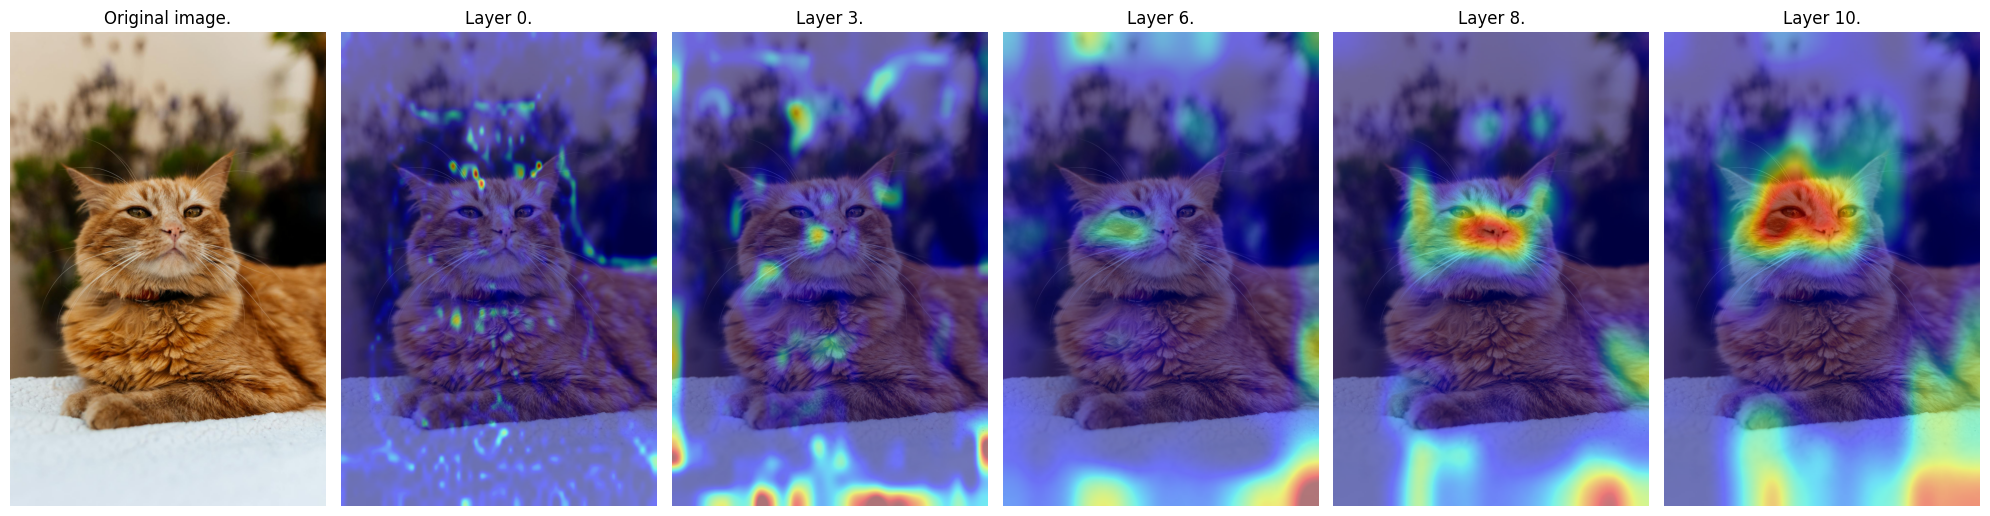

In [18]:
img1, tensor_img1 = utils.load_image('./image1.jpg', device, weights)
y_pred1 = utils.predict(model, weights, tensor_img1)
layer_number = [0, 3, 6, 8, 10]
utils.layers_vizualization(model, img1, tensor_img1, y_pred1, layer_number)


---
# **Katt.**
---
På den första bilden ser vi en katt, och AlexNet har klassificerat bilden som "tabby". En tabbykatt kännetecknas av ett specifikt pälsmönster som kan bestå av ränder, virvlar eller fläckar. Detta mönster är inte särskilt tydligt i bilden, men klassificeringen kan ändå betraktas som korrekt, eftersom modellen tydligt identifierar objektet som en katt.

För att bättre förstå modellens beslut analyserar vi aktiveringarna i de olika lagren och undersöker vilka områden i bilden som har störst påverkan på prediktionen för den aktuella klassen.

<u><b>Lager 0.</b></u>  I det första lagret observeras många utspridda aktiveringar. Dessa motsvarar främst konturer av objektet och strukturer i pälsen. Lagret reagerar huvudsakligen på enkla visuella drag såsom kanter och texturer, snarare än på katten som ett sammanhängande objekt.

<u><b>Lager 3.</b></u>  I detta lager blir aktiveringarna mer koncentrerade. Framför allt framträder området kring ansiktet och bröstområdet. Här börjar modellen kombinera enkla drag till mer komplexa mönster, vilket gör att delar av objektet kan identifieras.

<u><b>Lager 6.</b></u> Modellen uppvisar nu ett tydligt fokus på mitten av kattens ansikte. Bakgrunden får betydligt mindre uppmärksamhet.

<u><b>Lager 8.</b></u> Mycket starka aktiveringar syns över hela ansiktet, särskilt kring näsan, ögonen området mellan dem. I detta lagern har modellen identifierat de mest informativa delarna av bilden för klassificeringen.

<u><b>Lager 10.</b></u> I det sista, djupa lagret ligger fokus nästan uteslutande på kattens ansikte, det som är mest avgörande för den slutliga klassificeringen.

Den predikerade klassen för bilden är: SPORTS CAR.


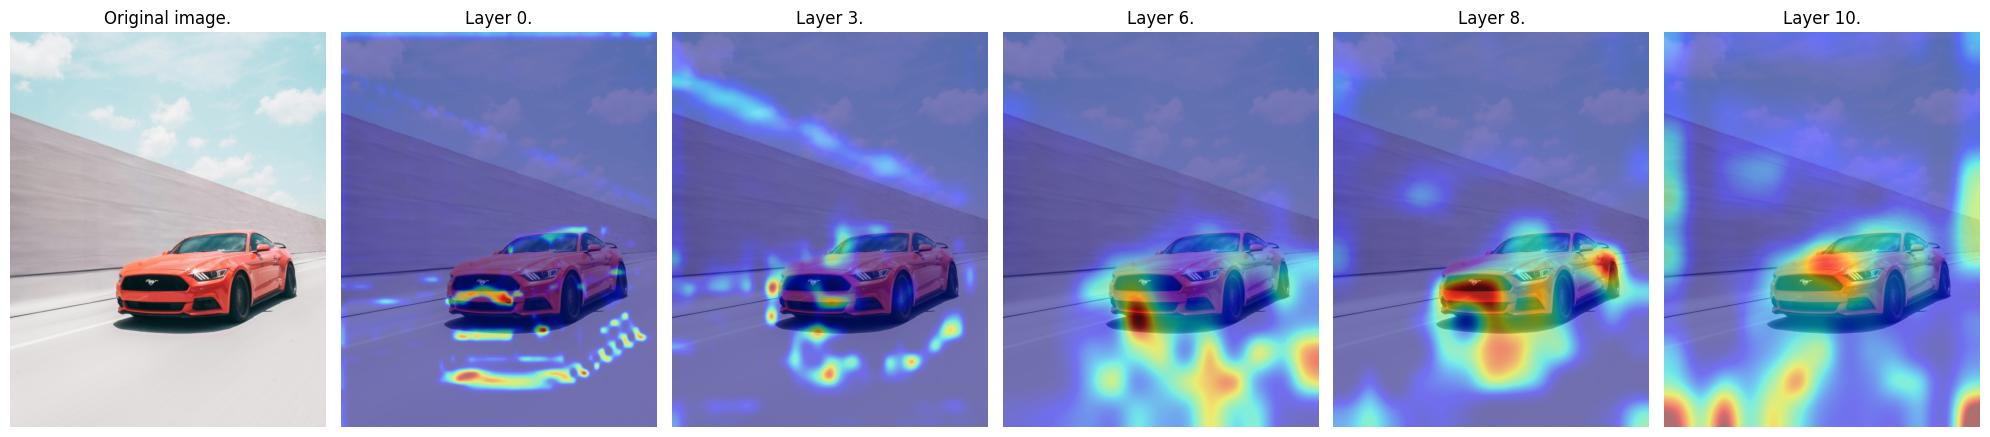

In [19]:
img2, tensor_img2 = utils.load_image('./image2.jpg', device, weights)
y_pred2 = utils.predict(model, weights, tensor_img2)
layer_number = [0, 3, 6, 8, 10]
utils.layers_vizualization(model, img2, tensor_img2, y_pred2, layer_number)


Den predikerade klassen för bilden är: BEACH WAGON.


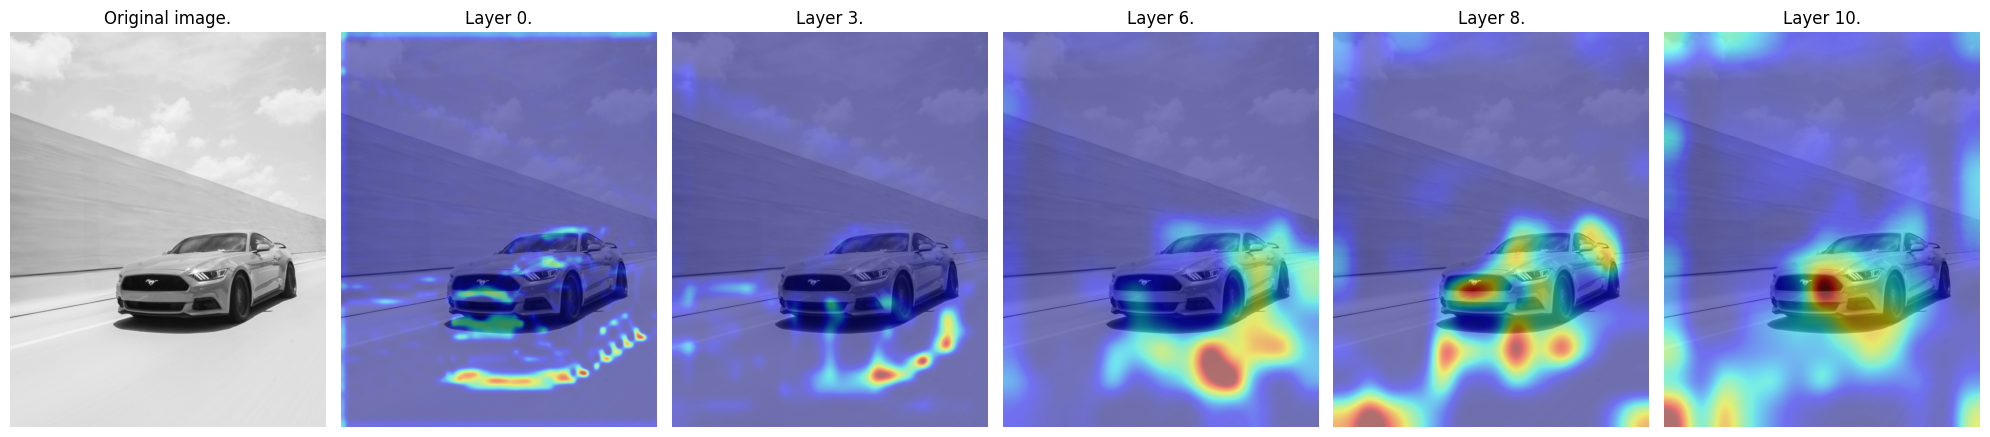

In [20]:
img2bw, tensor_img2bw = utils.load_image('./image2(1).jpg', device, weights)
y_pred2bw = utils.predict(model, weights, tensor_img2bw)
layer_number = [0, 3, 6, 8, 10]
utils.layers_vizualization(model, img2bw, tensor_img2bw, y_pred2bw, layer_number)

---
# **Bil.**
---
För att undersöka lite mer djup, testar jag samma bild med bil men i första varianten är bilden kulör och i andra är bilden svartvit. Den kulöra bilden AlexNet har klassificerat bilden som "sports car" vilket 100% rätt. Däremot den svartvita bilden var klassificierad som "beach wagon", vilket sämmer inte, men jag kommer att prata om det mer i slutstatsen. Annars ser alla altiveringar nästan ädintiska ut.


<u><b>Lager 0.</b></u>  I den första lagret ser vi markerade områden som bilens grill, tak och lite hjul, samt väggtexturer. Lagret reagerar på kanter och texturer. Bilen uppfattas inte som ett sammanhängande objekt.

<u><b>Lager 3.</b></u>  I detta lager blir aktiveringarna på bilens front och strålkastare, och samtidigt på väggtexturen och bakgrunden. Modelen titar bildelement hos en bil.

<u><b>Lager 6.</b></u> Modellen uppvisar nu ett tydligt fokus på mitten av kattens ansikte. Bakgrunden får betydligt mindre uppmärksamhet.

<u><b>Lager 8.</b></u> Mycket starka aktiveringar syns över hela ansiktet, särskilt kring näsan, ögonen området mellan dem. I detta lagern har modellen identifierat de mest informativa delarna av bilden för klassificeringen.

<u><b>Lager 10.</b></u> I det sista, djupa lagret ligger fokus nästan uteslutande på kattens ansikte, det som är mest avgörande för den slutliga klassificeringen.

---
# **Slutsats.**
---
Denna 